In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-clustering/breast-cancer-clustering.csv


In [26]:
df = pd.read_csv('/kaggle/input/iris-clustering/iris-clustering.csv')

In [27]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [28]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.390160,0.434679,-0.578623,-0.569232
1,-0.518512,-0.057373,-0.608179,-0.598308
2,-0.578457,0.136859,-0.584726,-0.552043
3,-0.631489,0.042163,-0.540152,-0.554689
4,-0.414170,0.499298,-0.542513,-0.533708


In [6]:
pip install mvlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 45.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.3.4-cp310-cp310-linux_x86_64.whl size=8466298 sha256=9e2b36edb9a55c10cfd06c1f6b98bdf8361f8eba5ccb20adbac4a2713c015b69
  Stored in directory: /root/.cache/pip/wheels/38/c6/49/eaba6d234887d98d9c85185e2a90bd7bb77934e85eefaf317e
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.4
    Uninstalling matplotlib-3.7.4:
      Successfully uninstalled matplotlib-3.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cartopy 0.22.0 requires matplotlib>=3.4, but you have matplotlib 3.3.4 which is incompatible.
arviz 0.17.0 requires matplotlib>=3.5,

In [29]:
import numpy as np
from mvlearn.cluster import MultiviewKMeans

# Duplicate the single view to create a multiview dataset
Xs = [df_normalized.values, df_normalized.values]

n_clusters = 3

# Create a MultiviewKMeans instance and fit the model to the data
m_kmeans = MultiviewKMeans(n_clusters=n_clusters, random_state=42)
m_clusters = m_kmeans.fit_predict(Xs)

# Display the clustering results
# For example, you can print the cluster assignments for each view
for i, view_clusters in enumerate(m_clusters):
    print(f'View {i+1} Cluster Assignments:', view_clusters)

# Visualize the clustering results or perform further analysis as needed
# Keep in mind that without true labels, interpretation may be limited

View 1 Cluster Assignments: 2
View 2 Cluster Assignments: 2
View 3 Cluster Assignments: 2
View 4 Cluster Assignments: 2
View 5 Cluster Assignments: 2
View 6 Cluster Assignments: 2
View 7 Cluster Assignments: 2
View 8 Cluster Assignments: 2
View 9 Cluster Assignments: 2
View 10 Cluster Assignments: 2
View 11 Cluster Assignments: 2
View 12 Cluster Assignments: 2
View 13 Cluster Assignments: 2
View 14 Cluster Assignments: 2
View 15 Cluster Assignments: 2
View 16 Cluster Assignments: 2
View 17 Cluster Assignments: 2
View 18 Cluster Assignments: 2
View 19 Cluster Assignments: 2
View 20 Cluster Assignments: 2
View 21 Cluster Assignments: 2
View 22 Cluster Assignments: 2
View 23 Cluster Assignments: 2
View 24 Cluster Assignments: 2
View 25 Cluster Assignments: 2
View 26 Cluster Assignments: 2
View 27 Cluster Assignments: 2
View 28 Cluster Assignments: 2
View 29 Cluster Assignments: 2
View 30 Cluster Assignments: 2
View 31 Cluster Assignments: 2
View 32 Cluster Assignments: 2
View 33 Cluster A

In [30]:
# Calculate metrics
ch_index = calinski_harabasz_score(np.hstack(Xs), np.hstack(m_clusters))
silhouette_avg = silhouette_score(np.hstack(Xs), np.hstack(m_clusters))
db_index = davies_bouldin_score(np.hstack(Xs), np.hstack(m_clusters))

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.5593081310260846
Calinski Harabasz Score: 272.03869095563556
Davies Bouldin Index: 0.7042605916214434


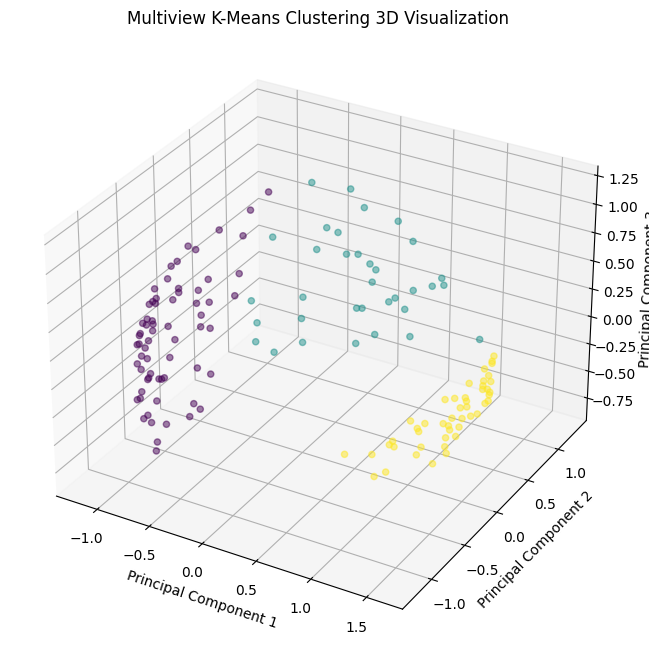

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming Xs is a list of views (Xs[0] and Xs[1] in this case)

# Concatenate the multiple views into a single array for PCA
X_multiview = np.hstack(Xs)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)  
X_multiview_pca = pca.fit_transform(X_multiview)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming m_clusters is the result of Multiview K-Means clustering
cluster_labels_multiview = np.hstack(m_clusters)

# Scatter plot with cluster labels from Multiview K-Means
ax.scatter(X_multiview_pca[:, 0], X_multiview_pca[:, 1], X_multiview_pca[:, 2],
           c=cluster_labels_multiview, cmap='viridis', alpha=0.5)

ax.set_title('Multiview K-Means Clustering 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [32]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have X_multiview_pca and cluster_labels_multiview defined
# X_multiview_pca is the result of PCA applied to the concatenated multiview data

# Create a 3D scatter plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X_multiview_pca[:, 0],
    y=X_multiview_pca[:, 1],
    z=X_multiview_pca[:, 2],
    mode='markers',
    marker=dict(color=cluster_labels_multiview, colorscale='viridis', opacity=0.5),
    text='Cluster Labels'
))

fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'),
                  title='Multiview K-Means Clustering 3D Visualization',
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()